# Data informasi

Kumpulan data berisi 9358 respons rata-rata per jam dari rangkaian 5 sensor kimia oksida logam yang tertanam dalam Perangkat Multisensor Kimia Kualitas Udara. Perangkat itu terletak di lapangan di area yang sangat tercemar, di permukaan jalan, di dalam kota Italia. Data direkam dari Maret 2004 hingga Februari 2005 (satu tahun) yang merupakan rekaman terlama yang tersedia secara bebas dari respons perangkat sensor kimia kualitas udara yang dikerahkan di lapangan. Ground Truth rata-rata konsentrasi per jam untuk CO, Hidrokarbon Non Metanik, Benzena, Total Nitrogen Oksida (NOx) dan Nitrogen Dioksida (NO2) dan disediakan oleh penganalisis bersertifikat referensi yang ditempatkan bersama. Bukti sensitivitas silang serta konsep dan penyimpangan sensor hadir seperti yang dijelaskan dalam De Vito et al., Sens. And Act. B, Jil. 129,2,2008 (rujukan?) akhirnya mempengaruhi kemampuan estimasi konsentrasi sensor. Nilai yang hilang ditandai dengan nilai -200.
Dataset ini dapat digunakan secara eksklusif untuk tujuan penelitian. Tujuan komersial sepenuhnya dikecualikan.

### Atribut Informasi:
* 0. **Date** (DD/MM/YYYY)
* 1. **Time** (HH.MM.SS)
* 2. **Konsentrasi** rata-rata CO2 per jam sebenarnya dalam mg/m^3 (penganalisis referensi)
* 3. **PT08.S1** (tin oxide) rata-rata respons sensor setiap jam (secara nominal CO ditargetkan)
* 4. **Benar-benar** rata-rata per jam konsentrasi Hidrokarbon Non Metanik keseluruhan dalam mikrog/m^3 (penganalisis referensi)
* 5. **Konsentrasi** Benzena rata-rata per jam sebenarnya dalam mikrog/m^3 (penganalisis referensi)
* 6. **PT08.S2** (titania) rata-rata respons sensor per jam (secara nominal ditargetkan NMHC)
* 7. **Konsentrasi** NOx rata-rata per jam yang sebenarnya dalam ppb (penganalisis referensi)
* 8. **PT08.S3** (tungsten oksida) rata-rata respons sensor setiap jam (nominal NOx bertarget)
* 9. **Konsentrasi** NO2 rata-rata per jam sebenarnya dalam mikrog/m^3 (penganalisis referensi)
* 10. **PT08.S4** (tungsten oxide) rata-rata respons sensor setiap jam (secara nominal ditargetkan NO2)
* 11. **PT08.S5** (indium oxide) rata-rata respons sensor setiap jam (secara nominal ditargetkan O3)
* 12. **Suhu** dalam Â°C
* 13. **Kelembaban** Relatif (%)
* 14. **AH** Kelembaban Mutlak

Kita akan mencoba membuat sebuah model yang memberi tau kelembaban udara. Karena Para ahli kesehatan merekomendasikan tingkat kelembaban udara (atau yang disebut dengan Relative Humidity – RH) pada kisaran 45% - 65%, sebagai tingkat yang ideal. Oleh karena itu kita akan menjadikan fitur `Kelembaban(RH)` sebagai Target, untuk menentukan ideal dari kelembaban udara.

Link: https://archive.ics.uci.edu/ml/datasets/Air+Quality#

## Import Library

Pertama kita import library yang akan kita gunakan, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

dataset yang kita gunakan bernama **AirQualityUCI.csv**. Kita juga menambahkan `sep=';'` karena kolom dataset kita di pisahkan dengan titik koma, sehingga kita harus menghapus pemisahnya. Dengan begitu Dataframe kita terlihat rapih, dan bisa digunakan.

In [2]:
df = pd.read_csv('dataset/AirQualityUCI.csv', sep=';')
df

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9466         NaN       NaN    NaN          NaN       NaN      NaN   
9467         NaN       NaN    NaN          NaN       NaN      NaN   
9468         NaN       NaN    NaN          NaN       NaN      NaN   
9469         NaN       NaN    NaN          NaN       NaN      NaN   
9470         NaN       NaN    NaN          NaN       NaN      NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16  
0          1268.0  13,6  48,9  0,7578          NaN          NaN  
1           972.0  13,3  47,7  0,7255          NaN          NaN  
2          1074.0  11,9  54,0  0,7502          NaN          NaN  
3          1203.0  11,0  60,0  0,7867          NaN          NaN  
4          1110.0  11,2  59,6  0,7888          NaN          NaN  
...           ...   ...   ...     ...          ...          ...  
9466          NaN   NaN   NaN     NaN          NaN          NaN  
9467          NaN   NaN   NaN     NaN          NaN          NaN  
9468          NaN   NaN   NaN     NaN          NaN          NaN  
9469          NaN   NaN   NaN     NaN          NaN          NaN  
9470          NaN   NaN   NaN     NaN          NaN          NaN  

[9471 rows x 17 columns]

Akan tetapi setelah saya keluarkan dataset Air Quality terdapat tambahan 2 kolom di belakang, saya tidak tau itu muncul dari mana. Namun saya akan menghapus kolom tersebut dengan fungsi `drop()`.

In [3]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
df.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,7867  
4  0,7888

Dan lagi, kasus ini adalah masalah regresi dan data kita memiliki kolom `Date`, `Time`. Sebenarnya data kita bisa di gunakan untuk time series, namun kali ini kita akan mengatasi masalah regresi pada dataset kita. Jadi kita akan menghapus data yang berbasis waktu.

In [4]:
df = df.drop(['Date', 'Time'], axis=1)
df.head()

CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0    2,6       1360.0     150.0     11,9         1046.0    166.0   
1      2       1292.0     112.0      9,4          955.0    103.0   
2    2,2       1402.0      88.0      9,0          939.0    131.0   
3    2,2       1376.0      80.0      9,2          948.0    172.0   
4    1,6       1272.0      51.0      6,5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13,6  48,9  0,7578  
1        1174.0     92.0        1559.0        972.0  13,3  47,7  0,7255  
2        1140.0    114.0        1555.0       1074.0  11,9  54,0  0,7502  
3        1092.0    122.0        1584.0       1203.0  11,0  60,0  0,7867  
4        1205.0    116.0        1490.0       1110.0  11,2  59,6  0,7888

# Exploratory Data Analysis (EDA)

Pada proses kita ingin membuat suatu pertanyaan untuk meng-exslporasi data kita. Sebagai contoh:

* Apa saja jenis variabel pada dataset?
* Bagaimana distribusi variabel dalam dataset?
* Apakah ada missing value?
* Apakah ada fitur yang tidak berguna (redundant)?
* Bagaimana korelasi antara fitur dan target?

## Deskripsi Variable

Pada bagian atas kita telah mendeskripsikan data yang kita gunakan, namun barusan kita telah melakukan sedikit perubahan pada data, jadi kita akan mendeskripsikan ulang sehingga lebih jelas, dan mudah di mengerti:

* 0. **CO(GT)** rata-rata CO2 per jam sebenarnya dalam mg/m^3 (penganalisis referensi)
* 1. **PT08.S1** (tin oxide) rata-rata respons sensor setiap jam (secara nominal CO ditargetkan)
* 2. **NMHC(GT)** rata-rata per jam konsentrasi Hidrokarbon Non Metanik keseluruhan dalam mikrog/m^3 (penganalisis referensi)
* 3. **C6H6(GT)** Benzena rata-rata per jam sebenarnya dalam mikrog/m^3 (penganalisis referensi)
* 4. **PT08.S2** (titania) rata-rata respons sensor per jam (secara nominal ditargetkan NMHC)
* 5. **NOx(GT)** NOx rata-rata per jam yang sebenarnya dalam ppb (penganalisis referensi)
* 6. **PT08.S3** (tungsten oksida) rata-rata respons sensor setiap jam (nominal NOx bertarget)
* 7. **NO2(GT)** NO2 rata-rata per jam sebenarnya dalam mikrog/m^3 (penganalisis referensi)
* 8. **PT08.S4** (tungsten oxide) rata-rata respons sensor setiap jam (secara nominal ditargetkan NO2)
* 9. **PT08.S5** (indium oxide) rata-rata respons sensor setiap jam (secara nominal ditargetkan O3)
* 10. **T** dalam Â°C
* 11. **RH** Relatif (%)
* 12. **AH** Kelembaban Mutlak

Data di atas merupakan atribut yang kita punya sekarang dan kita gunakan nanti pada tahap modeling. Tapi, apakah data di atas sudah bisa di gunakan untuk pemodelan? Jawabannya Tidak, karena kita lihat sebelumnya ada banyak data NaN. Oleh karena itu kita akan mengatasi masalah tersebut.

Dan kita ingatkan kembali:

FYI: Para ahli kesehatan merekomendasikan tingkat kelembaban udara (atau yang disebut dengan Relative Humidity – RH) pada kisaran 45% - 65%, sebagai tingkat yang ideal.

Oleh karena itu atribut `RH` akan menjadi target atau variable depedent dari dataset kita.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   object 
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   object 
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   object 
 11  RH             9357 non-null   object 
 12  AH             9357 non-null   object 
dtypes: float64(8), object(5)
memory usage: 962.0+ KB


Ketika kita melihat dataset kita semua nilai berbentuk numerik, namun ketika kita melihat detail dengan `info()`. terdapat tipe data Object, walaupun dalam dataset terlihat dalam bentuk numerik. Kita akan mengubah tipe data object tersebut menjadi tipe data float.

In [6]:
# menghapus koma dan menggantikannya dengan titik, serta mengubahnya menjadi tipe data Float.
df["CO(GT)"] = df["CO(GT)"].str.replace('[,]', '.').astype(float)
df["C6H6(GT)"] = df["C6H6(GT)"].str.replace('[,]', '.').astype(float)
df["T"] = df["T"].str.replace('[,]', '.').astype(float)
df["RH"] = df["RH"].str.replace('[,]', '.').astype(float)
df["AH"] = df["AH"].str.replace('[,]', '.').astype(float)
df.head(8)

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   
5     1.2       1197.0      38.0       4.7          750.0     89.0   
6     1.2       1185.0      31.0       3.6          690.0     62.0   
7     1.0       1136.0      31.0       3.3          672.0     62.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  
5        1337.0     96.0        1393.0        949.0  11.2  59.2  0.7848  
6        1462.0     77.0        1333.0        733.0  11.3  56.8  0.7603  
7        1453.0     76.0        1333.0        730.0  10.7  60.0  0.7702

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 962.0 KB


Sekarang data kita sudah menjadi type data float, serta menghapus koma di dalam data string agar bisa di convert. Kemudian kita juga akan melihat data kita menggunakan fungsi `describe()`.

In [8]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count  adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom. 
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

## Missing Value

Kita juga akan mengecek apakah data kita memiliki missing value di dalamnya, dengan `isnull().sum()` kita bisa melihat atribut apa saja yang memiliki missing value.

In [9]:
df.isnull().sum()

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

Ternyata semua atribut memiliki missing value, dan memiliki jumlah missing yang sama pula. Kita akan mengatasi hal itu dengan mengisinya dengan nilai **median**. Kita tidak akan menghapus data tersebut karena kita ingin data tetap dalam keadaan seperti itu. Namun jika kita memilih menghapus data tersebut, maka tidak masalah karena jumlah data kita yang cukup banyak. Yaitu sekitar `9358`

Sekali lagi ini hanya opsional saja, tergantung kasus yang kita hadapi. Di sini saya memilih mengisinya dengan nilai **median**.

In [10]:
df = df.fillna(df.median())

In [11]:
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Median adalah suatu nilai yang membagi data menjadi dua bagian yang sama banyaknya setelah data tersebut diurutkan dari yang terkecil sampai yang terbesar. Gampangnya median adalah nilai tengah.

## Outliers

Sekarang data kita sudah bersih dari missing value, selanjutnya kita akan melihat apakah data kita memiliki Outlier di dalamnya. Outlier adalah nilai yang berbeda sangat jauh dari pada nilai data yang lain nya.

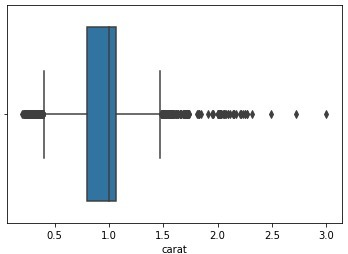

Kalau kita lihat terdapat nilai yang memiliki rentang yang sangat jauh dari data lain, itulah yang di sebut dengan outlier, adanya outlier akan sangat berpengaruh pada proses modeling. Oleh karena itu kita akan mencoba mengecek atribut kita apakah memiliki outlier atau tidak.

<AxesSubplot:xlabel='CO(GT)'>

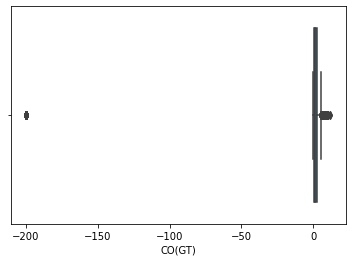

In [12]:
# CO(GT)
sns.boxplot(x=df['CO(GT)'])

<AxesSubplot:xlabel='PT08.S1(CO)'>

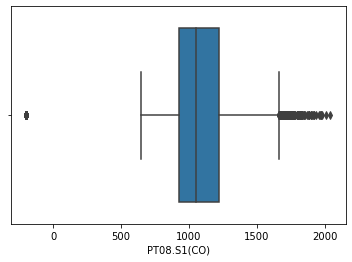

In [13]:
# PT08.S1(CO)
sns.boxplot(x=df['PT08.S1(CO)'])

<AxesSubplot:xlabel='NMHC(GT)'>

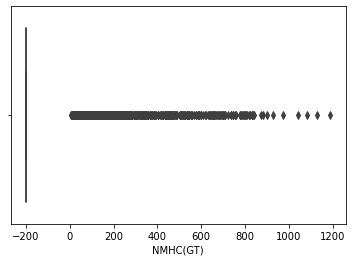

In [14]:
# NMHC(GT)
sns.boxplot(x=df['NMHC(GT)'])

<AxesSubplot:xlabel='C6H6(GT)'>

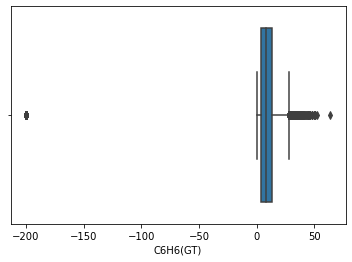

In [15]:
# C6H6(GT)
sns.boxplot(x=df['C6H6(GT)'])

<AxesSubplot:xlabel='PT08.S2(NMHC)'>

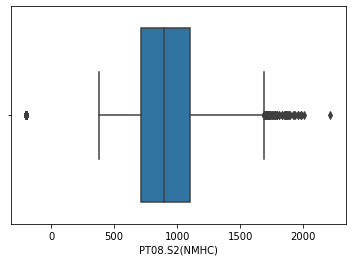

In [16]:
# PT08.S2(NMHC)
sns.boxplot(x=df['PT08.S2(NMHC)'])

<AxesSubplot:xlabel='NOx(GT)'>

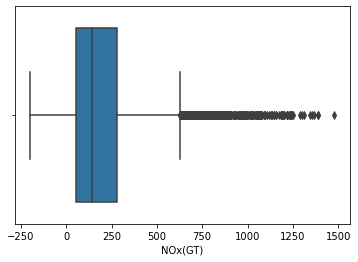

In [17]:
# NOx(GT)
sns.boxplot(x=df['NOx(GT)'])

<AxesSubplot:xlabel='PT08.S3(NOx)'>

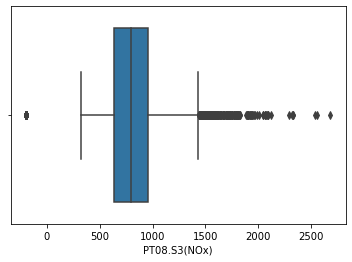

In [18]:
# PT08.S3(NOx)
sns.boxplot(x=df['PT08.S3(NOx)'])

<AxesSubplot:xlabel='NO2(GT)'>

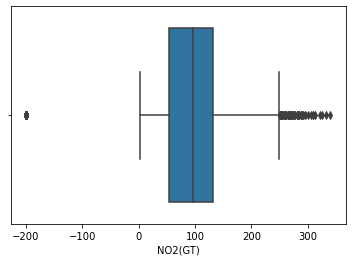

In [19]:
# NO2(GT)
sns.boxplot(x=df['NO2(GT)'])

Oke kita tidak akan membuat semua visual outlier pada data kita, karena dari sini kita bisa tau bahwa data kita memiliki banyak outlier dari setiap atribut. Oleh karena itu kita berasumsi bahwa atribut lain akan memiliki hal yang sama seperti yang lain.

Selanjutnya kita akan mencoba menghilangkan outlier dari data kita menggunakan metode `IQR Method` IQR atau Interquartile Range adalah selisih dari kuartil ketiga (persentil 75) dengan kuartil pertama (persentil 25). Jika ditulis dalam formula 
IQR = Q3 – Q1.

In [20]:
# Metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

(5555, 13)

Data kita sekarang menjadi `5555` yang sebelumnya adalah `9358`, nilai yang bersifat outlier pada dataset akan di hapus. Oleh karena itu data kita sekarang sudah semakin bersih dengan hilangnya nilai outlier.

Namun apakah sudah selesai dengan ini, dan siap dalam modeling? Tentu belum. Karena kita akan mencoba mencari korelasi antar variable, dan melihat korelasi antara atribut dengan target.

## Univariate Analysis

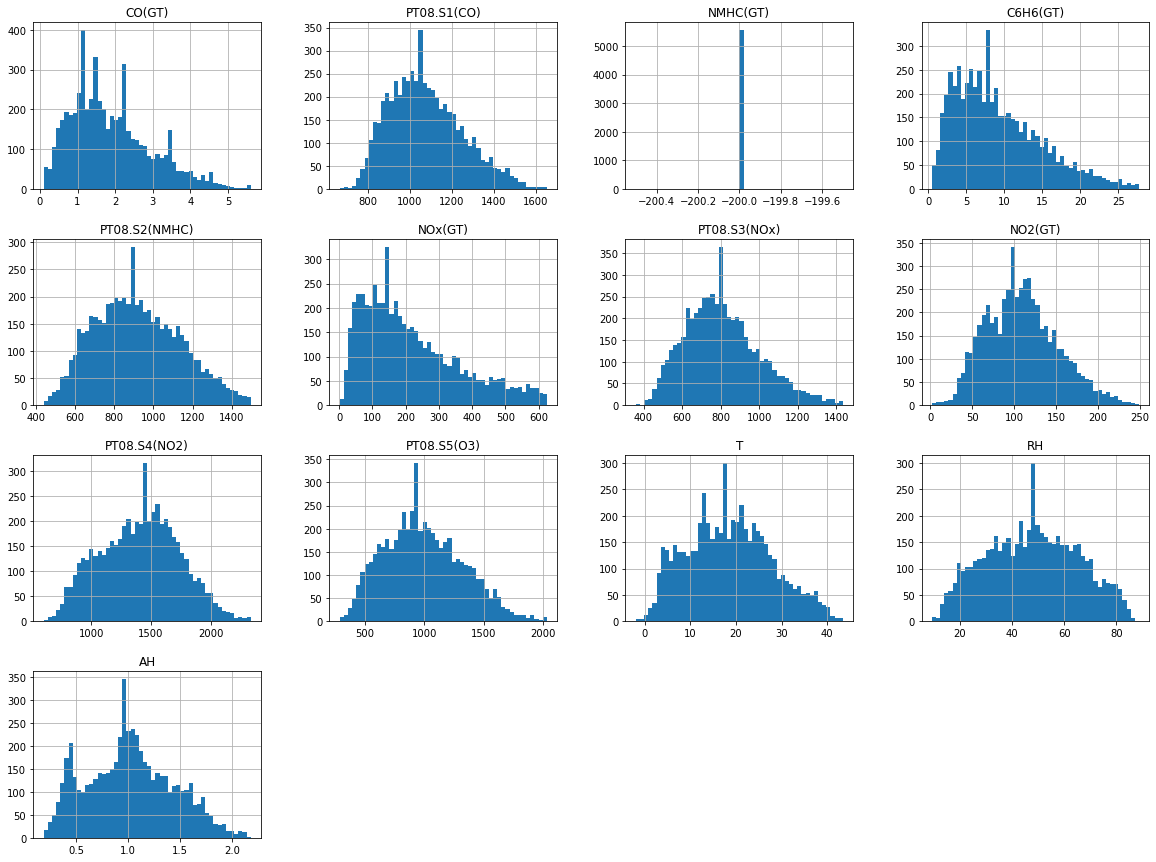

In [21]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Setelah kita lihat data di atas, dan perhatikan pada atribut NMHC(GT) memiliki nilai yang monoton yaitu -200. Kami khawatir itu juga akan menjadi pengaruh untuk melakukan proses modeling, jadi kami memutuskan untuk menghapusnya terlebih dahulu.

In [22]:
df = df.drop('NMHC(GT)', axis=1)

## Multivariate Analysis

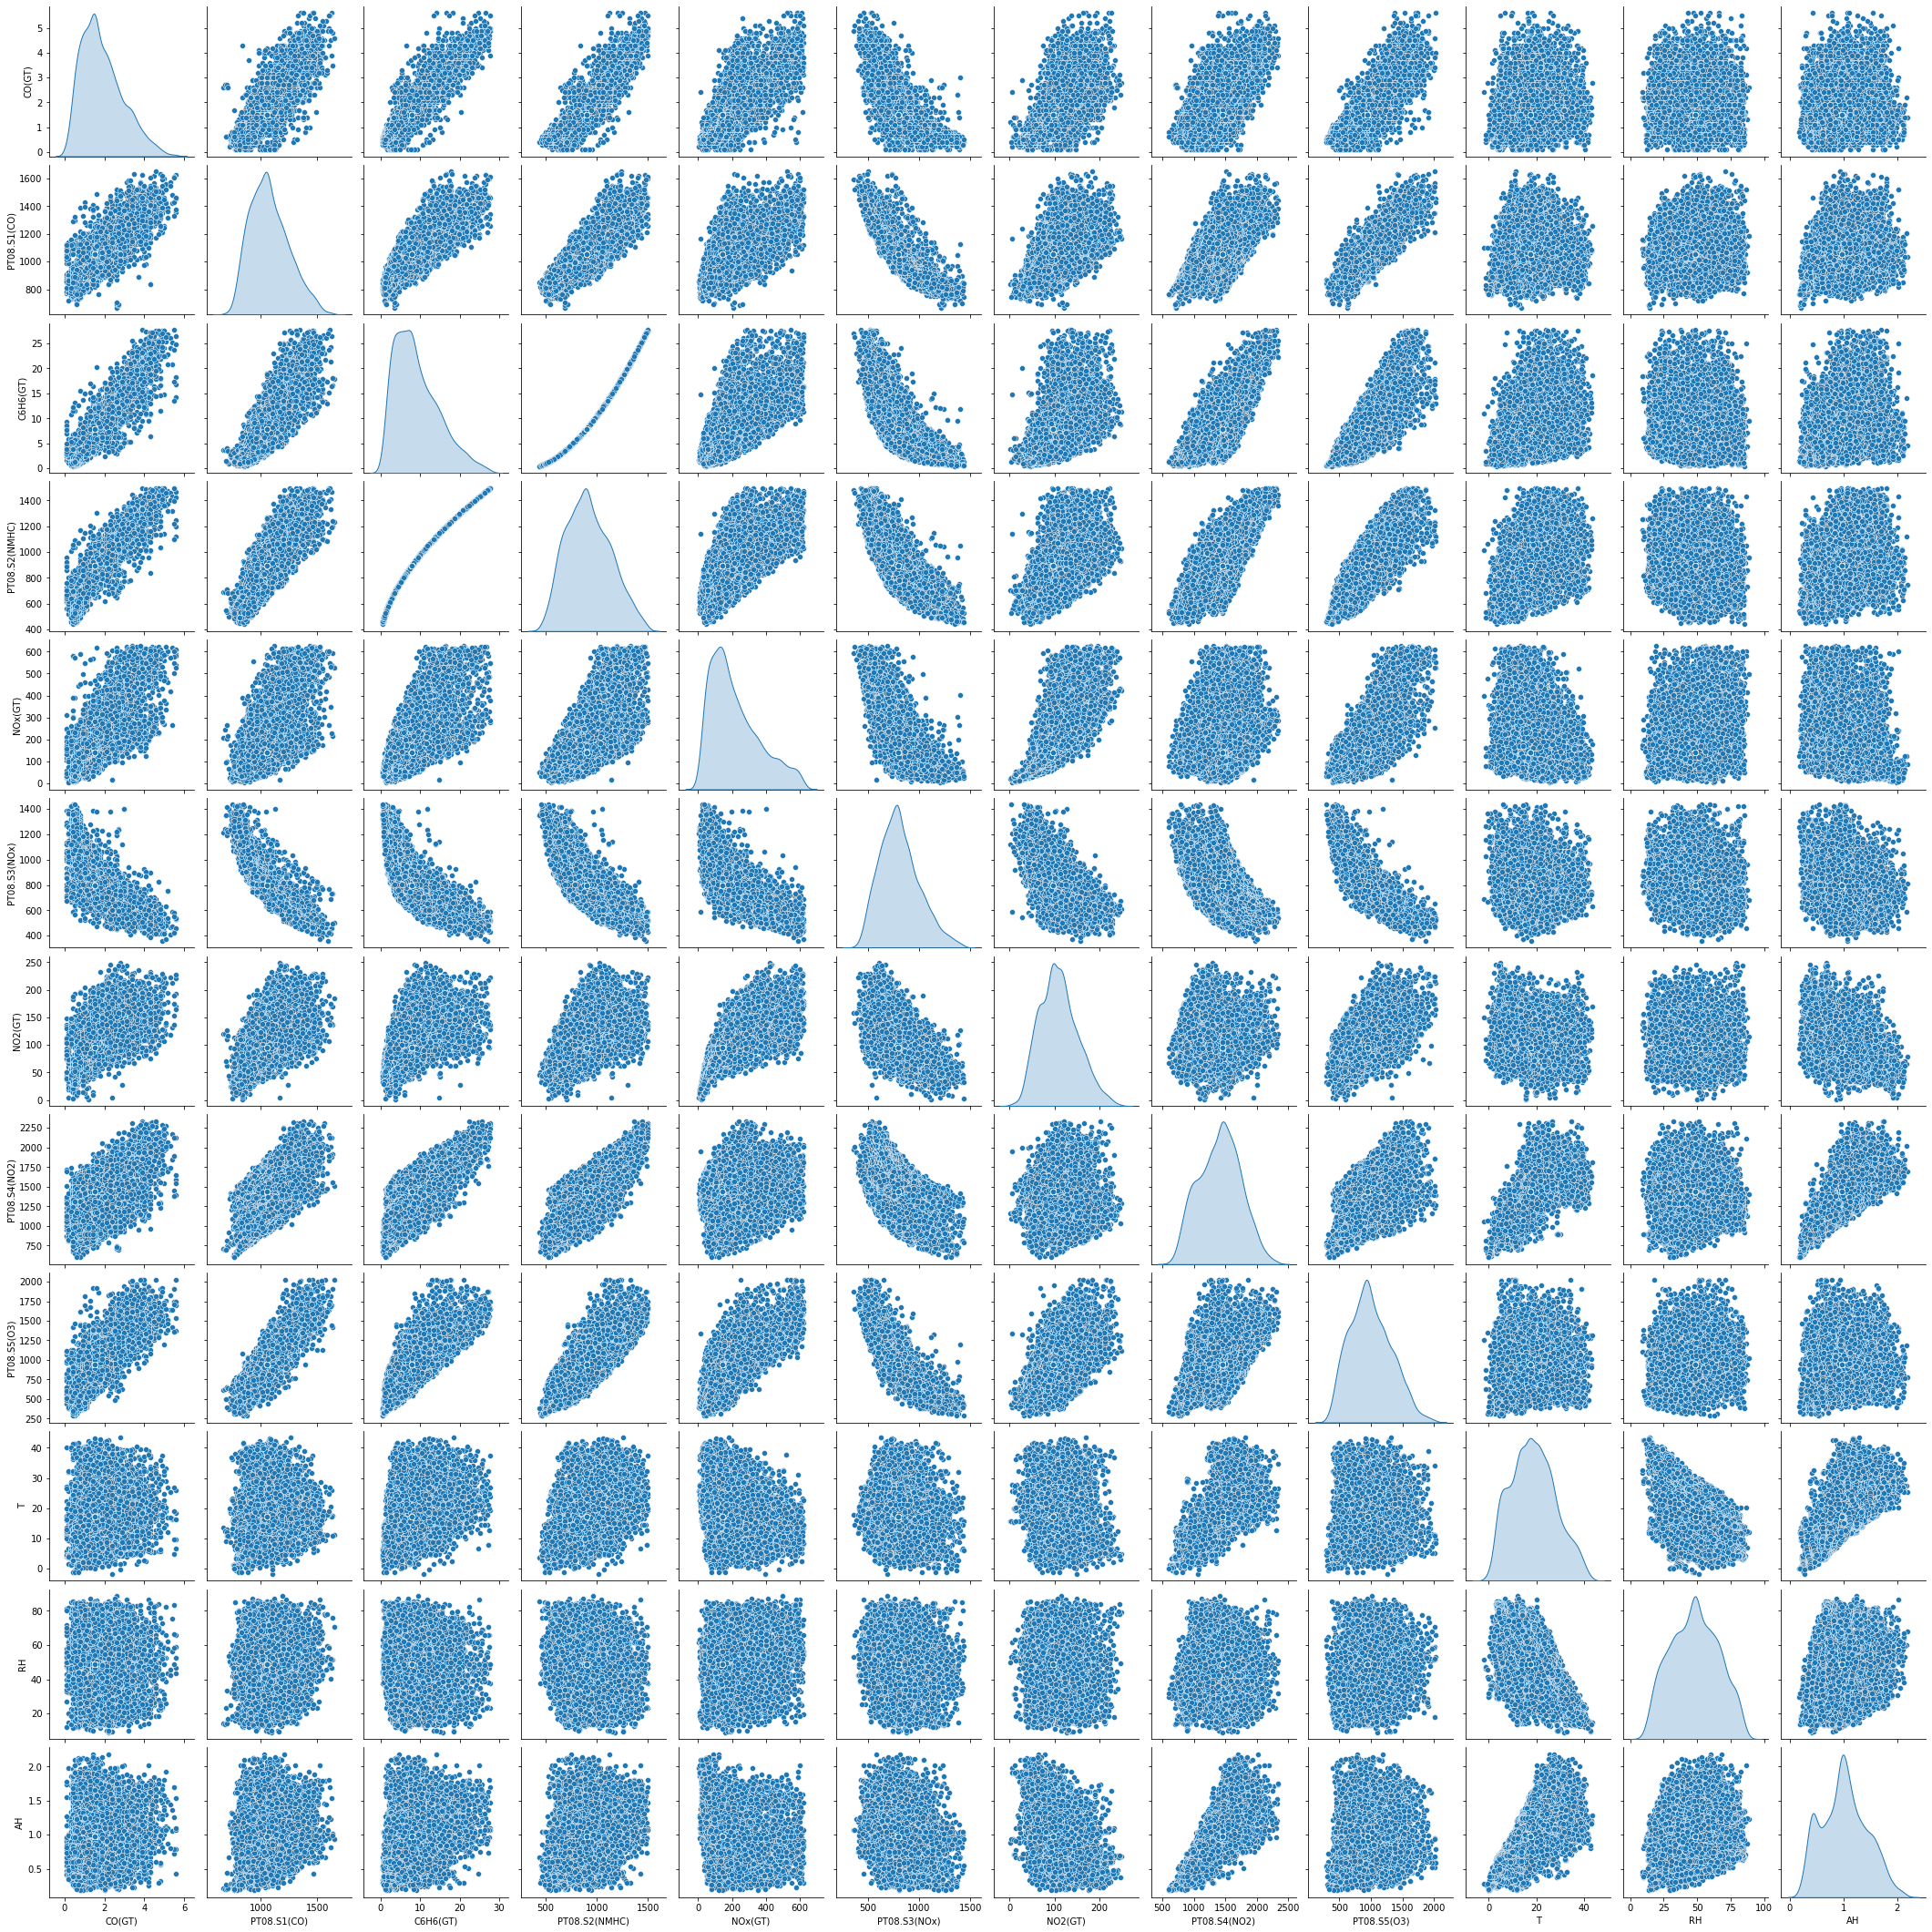

In [23]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

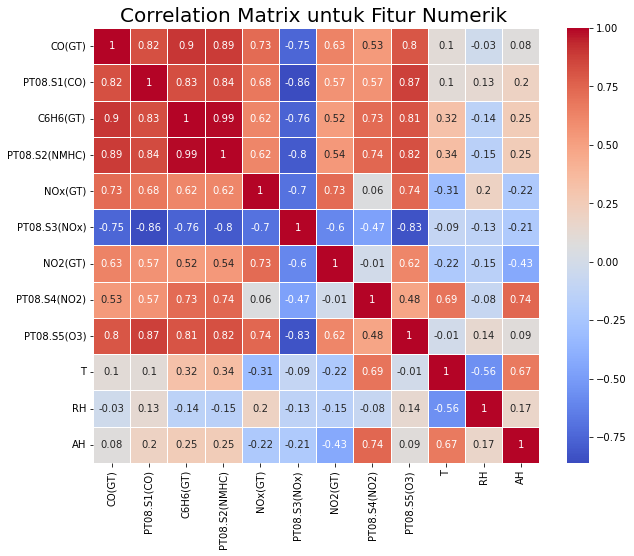

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Setelah di atas kita melihat visual dari atribut yang kita miliki, kita bisa simpulkan bahwa setiap atribut memliki korelasi yang cukup baik. Akan tetapi kita menemukan korelasi yang sangat kuat pada atribut `C6H6(GT)` dengan `PT08.S2(NMHC)` yaitu hampir sempurna. Oleh karena itu kedua atribut tersebut akan kita coba gabungkan dengan PCA pada tahap Data Preparation.

# Data Preparation

Tahap ini kita akan melakukan metode PCA pada data kita, kemudian juga split data menjadi train dan test set data, dan terakhir Standarisasi. Kita melakukan itu semua untuk menyiapkan data kita pada tahap modeling nanti.

## PCA

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['C6H6(GT)', 'PT08.S2(NMHC)']])
df['Combine'] = pca.transform(df.loc[:, ('C6H6(GT)','PT08.S2(NMHC)')]).flatten()
df.drop(['C6H6(GT)','PT08.S2(NMHC)'], axis=1, inplace=True)

In [26]:
df.head()

CO(GT)  PT08.S1(CO)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
184     4.5       1617.0    349.0         686.0    150.0        2010.0   
185     2.8       1473.0    224.0         831.0    152.0        1752.0   
186     2.2       1379.0    171.0         899.0    139.0        1663.0   
187     2.2       1385.0    149.0         891.0    133.0        1648.0   
188     2.3       1379.0    137.0         901.0    126.0        1660.0   

     PT08.S5(O3)     T    RH      AH     Combine  
184       1819.0  17.8  40.5  0.8210  414.365035  
185       1568.0  20.8  34.4  0.8365  208.253362  
186       1374.0  23.8  28.2  0.8219  149.226621  
187       1268.0  24.2  28.7  0.8515  137.222873  
188       1144.0  25.2  24.9  0.7829  168.235753

Lihat, kedua data tersebut di gabung menjadi atribut `Combine` dengan begitu kita juga telah mengurangi atribut dalam dataset kita tanpa mengurangi kualitas dari dataset. Tahap selanjutnya adalah melakukan Split data menjadi Training dan Test.

## Split Data Train dan Test set

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(['RH'], axis=1)
y = df['RH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [28]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5555
Total # of sample in train dataset: 4999
Total # of sample in test dataset: 556


In [29]:
X_test

CO(GT)  PT08.S1(CO)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
8985     1.1       1027.0    132.0         788.0     94.0        1149.0   
7342     2.4       1409.0    479.0         475.0    145.0        1640.0   
8944     4.3       1400.0    558.0         465.0    192.0        1542.0   
1725     2.0       1308.0    123.0         757.0    110.0        1724.0   
2977     3.4       1091.0    210.0         682.0    128.0        1797.0   
...      ...          ...      ...           ...      ...           ...   
2205     2.3       1142.0    140.0         782.0    133.0        1789.0   
6817     4.5       1293.0    542.0         631.0    170.0        1365.0   
7860     1.1       1024.0    241.0         814.0    122.0         944.0   
1564     2.3       1135.0    138.0         803.0    111.0        1630.0   
2973     1.3        933.0    105.0         888.0     72.0        1514.0   

      PT08.S5(O3)     T      AH     Combine  
8985        666.0  13.2  0.9801 -234.877936  
7342       1538.0  14.1  1.0552  304.301255  
8944       1661.0  15.4  0.7379  308.305063  
1725        989.0  32.8  0.9515  165.234176  
2977       1153.0  23.6  1.0282  242.270377  
...           ...   ...     ...         ...  
2205       1047.0  40.4  1.2774  190.246462  
6817       1278.0   5.2  0.7411  217.258092  
7860       1198.0   2.0  0.4661 -194.873123  
1564       1317.0  20.8  0.8365  146.225044  
2973        710.0  26.0  1.1509  -87.851866  

[556 rows x 10 columns]

In [30]:
y_test

8985    64.8
7342    65.9
8944    42.5
1725    19.5
2977    35.7
        ... 
2205    17.2
6817    83.1
7860    64.9
1564    34.5
2973    34.9
Name: RH, Length: 556, dtype: float64

# Modeling

Pada tahap ini kita akan mencoba melatih model yang telah kita perbaiki sebelumnya, ada 3 model yang akan coba antara lain.

* Random Forest Regressor
* SVR
* XGBoost Regressor

Mungkin ada yang bertanya kenapa tidak melakukan tahap Standarisasi, sebelumnya saya ingin bicara bahwa di balik ini sudah banyak di lakukan eksperimen. Kita telah mencoba standarisasi namun hasilnya tidak begitu jauh bahkan lebih bagus jika tidak melakukannya.

Pada eksperimen pertama saya menggunakan Standarisasi dan juga perubahan pada dataset, saya mendapatkan skor tinggi dari ketiga Algoritma namun yang tidak di perhatikan adalah tingkat erornya. Dengan `MSE` kita mendapatkan sekitar 15% ke atas, itu adalah angka yang lumayan untuk mengetahui tingkat eror. Tapi.

Setelah melakukan banyak eksperimen tanpa mengikutsertakan Standarisasi saya mendapatkan skor yang sangat tinggi bahkan hampir 100%, dan ketika saya melihat tingkat erornya menggunakan `MSE` dkk, saya mendapati skor yang sangat kecil hampir mendekati 0%. Oleh karena itu saya memilih untuk tidak melakukan Standarisasi agar model Machine Learning kita sederhana.

### Random Forest Regressor

In [31]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [32]:
print('Accuracy: {:.2f} %'.format(rfr.score(X_test, y_test)*100))

Accuracy: 99.84 %


In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_preds = rfr.predict(X_test)
print('R2_Score:', r2_score(y_test, y_preds))
print('MAE:', mean_absolute_error(y_test, y_preds))
print('MSE:', mean_squared_error(y_test, y_preds))

R2_Score: 0.9984370394737508
MAE: 0.44378866906475306
MSE: 0.47614977473021736


### SVR

In [34]:
# SVR
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [35]:
print('Accuracy: {:.2f} %'.format(svr.score(X_test, y_test)*100))

Accuracy: 39.16 %


Sebenarnya jika kita menggunaka Standarisasi, kita bisa mendapat skor jauh di atas ini. Akan tetapi skor tersebut masih kalah jauh dengan 2 Algoritma yang kita pakai, dengan Standarisasi kita bisa mendapat sekitar 86% untuk SVR.

In [36]:
y_preds2 = svr.predict(X_test)
print(r2_score(y_test, y_preds2))
print(mean_absolute_error(y_test, y_preds2))
print(mean_squared_error(y_test, y_preds2))

0.39162810107041823
11.132040860182435
185.33810532162644


### XGBoost Regressor

In [37]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgbr = XGBRegressor(booster='gbtree', gamma=2, max_depth=3, eta=0.2, n_estimators=500)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.2, gamma=2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.200000003,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [38]:
print('Accuracy: {:.2f} %'.format(xgbr.score(X_test, y_test)*100))

Accuracy: 99.63 %


In [39]:
y_preds3 = xgbr.predict(X_test)
print(r2_score(y_test, y_preds3))
print(mean_absolute_error(y_test, y_preds3))
print(mean_squared_error(y_test, y_preds3))

0.9963089345288765
0.8304369089414748
1.1244685729892425


Setelah melihat hasil di atas kita bisa menyimpulkan bahwa akurasi dari ketiga model:

* **Random Forest** : 99.84 %
* **SVR** : 39.16 %
* **XGBoost** : 99.63 %

Itu adalah angka yang luar biasa, walaupun kita mendapat akurasi yang sangat rendah pada SVR. Akan tetapi 2 Algoritma kita yaitu `Random Forest` dan `XGBoost` memiliki akurasi yang hampir sama, namun Random Forest masih di atas XGBoost.

Oleh karena itu kita akana menggunakan `Random Forest Regression` sebagai model Machine Learning kita.

# k-Fold Cross Validation

Salah satu cara mengevaluasi model yang banyak dilakukan dan terbilang efektif yaitu K-Fold Cross Validation. Secara sederhana dapat diartikan dengan sebuah prosedur memisahkan antara data training dan data testing.

Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi. Model atau algoritma dilatih oleh subset pembelajaran dan divalidasi oleh subset validasi. Selanjutnya pemilihan jenis CV dapat didasarkan pada ukuran dataset. Biasanya CV K-fold digunakan karena dapat mengurangi waktu komputasi dengan tetap menjaga keakuratan estimasi.

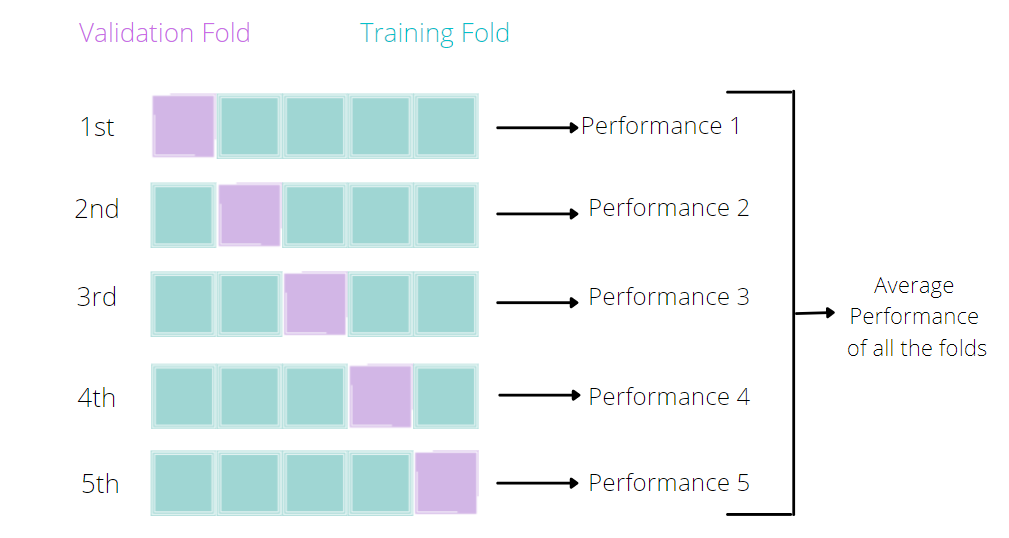

In [40]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfr, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.78 %
Standard Deviation: 0.05 %


In [41]:
accuracies_SVR = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies_SVR.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_SVR.std()*100))

Accuracy: 35.42 %
Standard Deviation: 1.02 %


In [42]:
accuracies_XGB = cross_val_score(estimator = xgbr, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies_XGB.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_XGB.std()*100))

Accuracy: 99.56 %
Standard Deviation: 0.03 %


# Save Model

In [45]:
import pickle

filename = 'AQRegression.h5'
pickle.dump(rfr, open(filename, 'wb'))

# Load Model

In [46]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print('Accuracy: {:.2f} %'.format(result*100))

Accuracy: 99.84 %


# Kesimpulan

Banyak tahap yang telah kita lalui setelah melakukan pembersihan data, melihat korelasi atribut, pemisahan data, modeling, evaluasi dengan Cross Validasi, dan terakhir adalah save model. Banyak hal yang mempengaruhi hasil modeling Machine Learning, mulai dari data yang tidak bersih, adanya outlier. Kita terus mencoba merombak data kita tanpa mengubah value di dalamnya. Dan mendapatkan akurasi yang sangat bagus pada tahap Modeling.

Sekian dari saya.
Terima Kasih...